### Thinking1:为什么股票预测问题容易出现过拟合，也就是在训练的时候结果很好，在真实环境下面的结果可能没有那么好？

- 不管是什么机器学习方法，其成立的条件都是能在训练集中提取出能在测试集中保持一致的统计特征，否则是无法泛化的，或者说得有 stucture 能保持平稳，然后你能把它提取出来。但是股票短时间内 structure 会变化，因为影响股票的 temporal dynamics 的外部因素有千千万万，例如国家经济形势、产业政策、市场信心等等。如果拿过去一段时间的数据训练了一个 LSTM，结果第二天国家调整了政策，股票的 structure 都变了，训练出来的 LSTM 还能不能用根本说不清楚， LSTM 提取出的 stucture 第二天变没变——更要命的是你甚至可能难以解释 LSTM 究竟提取了什么，因此如果你要做预测，最直接的思路是用很简单的模型来做，因为简单的模型参数少，你用极短时间内的数据就能训练，因此你可以赶在外部因素变化之前做一些简单的预测。

### Thinking2: Prophet 与 ARMA / ARIMA 相比，优势在哪些地方？

- 基于相加模型的时间预测，可以精准的拟合出非线性的周期趋势
- 添加了 holiday (影响因子），可以更好的对节日（比如 十一、春节）带来的活跃数据进行预测
- 处理数据丢失问题
- 趋势迁移问题（shifts in the trend)
- 异常的数据点的处理的问题
- 不需要特征工程就能得到趋势，季节因素和节假日因素

### Thinking3:什么是时序数据库？为什么时序数据库是增长最快的数据类型？

1. 时序数据库的定义：
- 时序数据是基于时间的一系列的数据。在有时间的坐标中将这些数据点连成线，往过去看可以做成多纬度报表，揭示其趋势性、规律性、异常性;往未来看可以做大数据分析，机器学习，实现预测和预警。
- 时序数据库就是存放时序数据的数据库，并且需要支持时序数据的快速写入、持久化、多纬度的聚合查询等基本功能。

2. 为什么时序数据库是增长最快的数据类型？
- 对比传统数据库仅仅记录了数据的当前值，时序数据库则记录了所有的历史数据。同时时序数据的查询也总是会带上时间作为过滤条件。
- 很多人可能认为在传统关系型数据库上加上时间戳一列就能作为时序数据库。数据量少的时候确实也没问题，但少量数据是展现的纬度有限，细节少，可置信低，更加不能用来做大数据分析。很明显时序数据库是为了解决海量数据场景而设计的。

可以看到时序数据库需要解决以下几个问题

- 时序数据的写入：如何支持每秒钟上千万上亿数据点的写入。

- 时序数据的读取：又如何支持在秒级对上亿数据的分组聚合运算。

- 成本敏感：由海量数据存储带来的是成本问题。如何更低成本的存储这些数据，将成为时序数据库需要解决的重中之重。

### Action1:交通流量的预测

In [23]:
import pandas as pd 
# 数据加载
train = pd.read_csv('./jetrail/train.csv')
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [25]:
# 转化时间为 pandas 里面的日期格式
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.index = train['Datetime']
# 去掉 ID 和 Datetime
train.drop(['ID','Datetime'], axis = 1, inplace = True)
train.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [26]:
daily_train = train.resample('D').sum()  # 按天采样
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count

train.drop(['Count'], axis = 1, inplace = True)
train.head()

""
Datetime
2012-08-25 00:00:00
2012-08-25 01:00:00
2012-08-25 02:00:00
2012-08-25 03:00:00
2012-08-25 04:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


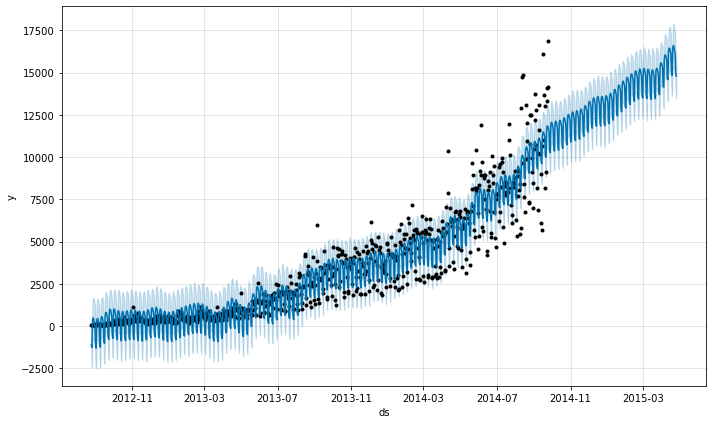

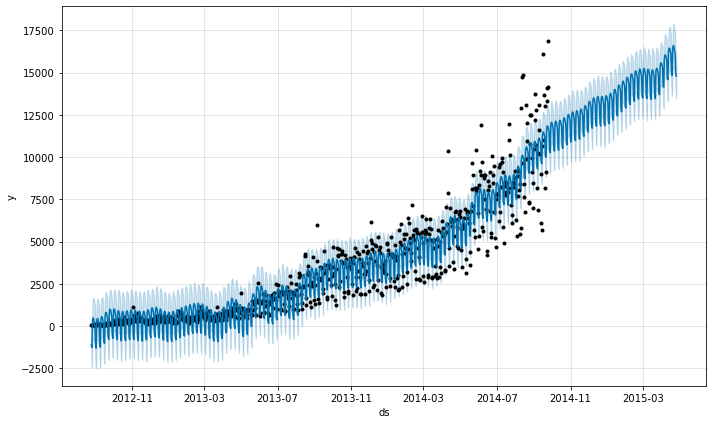

In [30]:
from fbprophet import Prophet
m = Prophet(yearly_seasonality = True, seasonality_prior_scale = 0.1)
m.fit(daily_train)
# 预测未来 7 个月，213 天
future = m.make_future_dataframe(periods = 213)
forecast = m.predict(future)
m.plot(forecast)

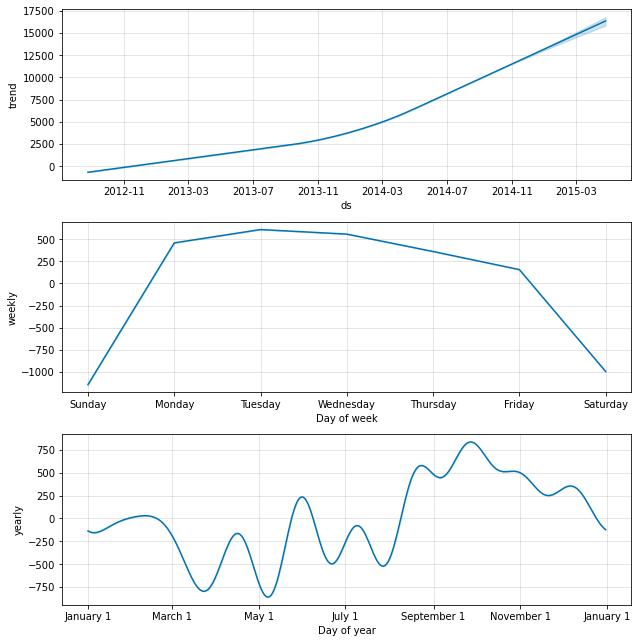

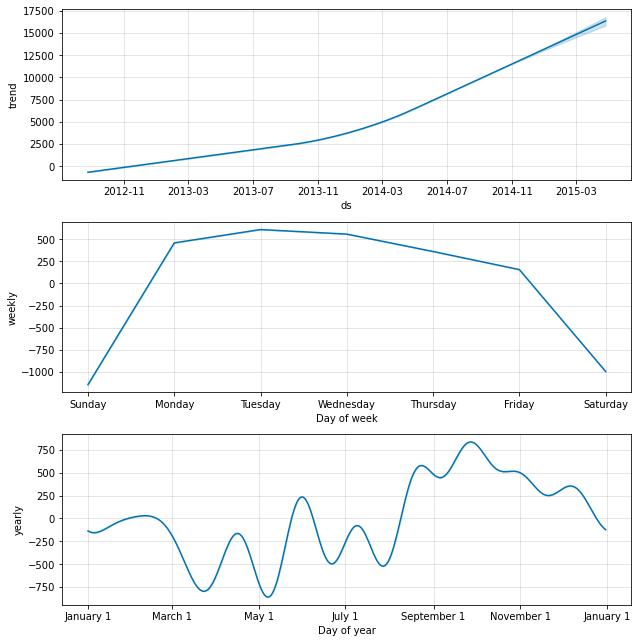

In [31]:
m.plot_components(forecast)